## Exploratory Data Analysis

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('C:\\Users\\shrei\\OneDrive\\Desktop\\Machine Learning\\Projects\\crime-data-clustering\\data\\crime_in_la.csv')
print("Dataset loaded")



Dataset loaded


In [18]:
# Feature Extraction
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], errors='coerce')
data['DayOfWeek'] = data['DATE OCC'].dt.dayofweek
data['TIME OCC'] = data['TIME OCC'].astype(str).str.zfill(4)
data['Hour'] = data['TIME OCC'].str[:2].astype(int)


C:\Users\shrei\AppData\Local\Temp\ipykernel_9280\2259540462.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], errors='coerce')


### Top Crime Types

<Axes: >

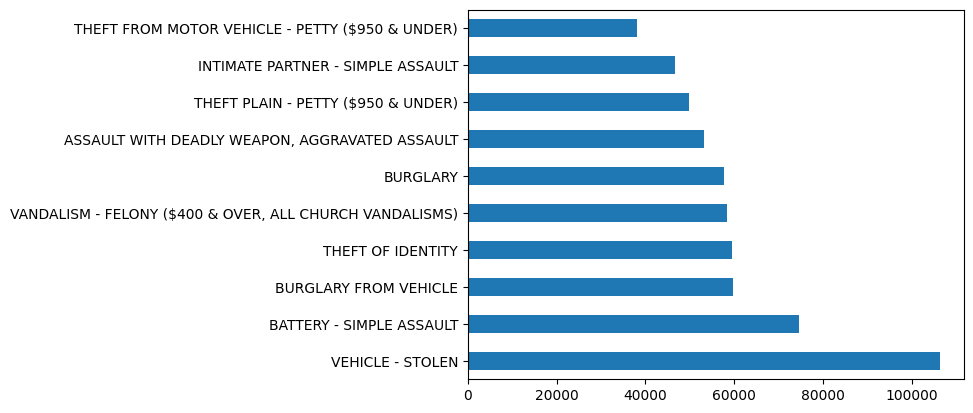

In [19]:
data['Crm Cd Desc'].value_counts().head(10).plot(kind='barh')


## Top Crimes by Area

<Axes: >

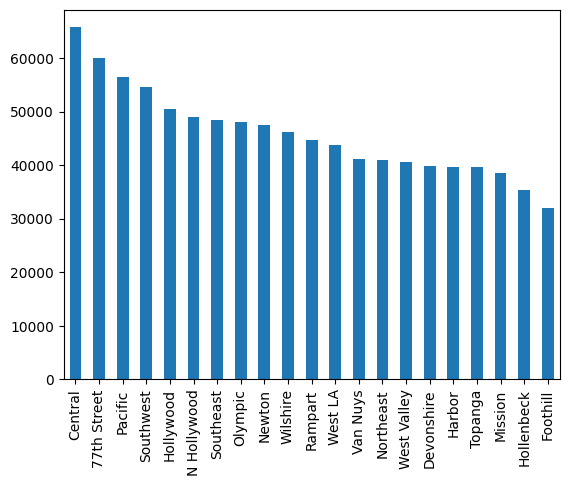

In [20]:
data['AREA NAME'].value_counts().plot(kind='bar')


## Victim Age Distrubution

<Axes: ylabel='Frequency'>

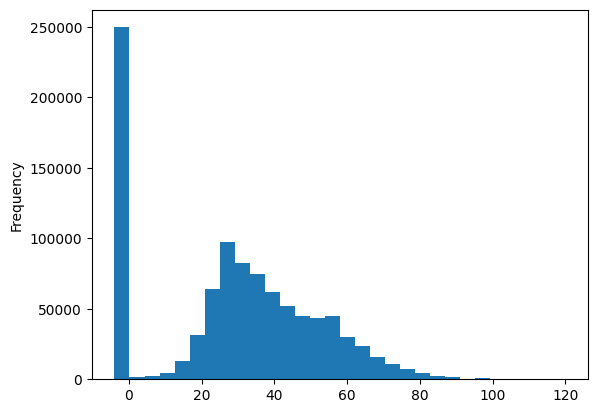

In [ ]:
data['Vict Age'].plot(kind='hist', bins=30)    #0 indicates unknown age


## Crime Distrubution by Hour

<Axes: >

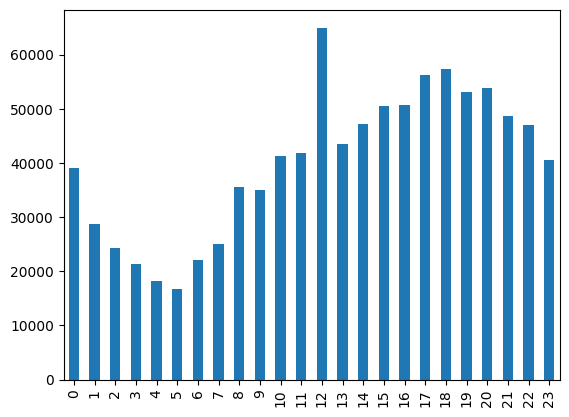

In [22]:
data['Hour'].value_counts().sort_index().plot(kind='bar')


## Crime Heatmap by Day and Time

<Axes: xlabel='Hour', ylabel='DayOfWeek'>

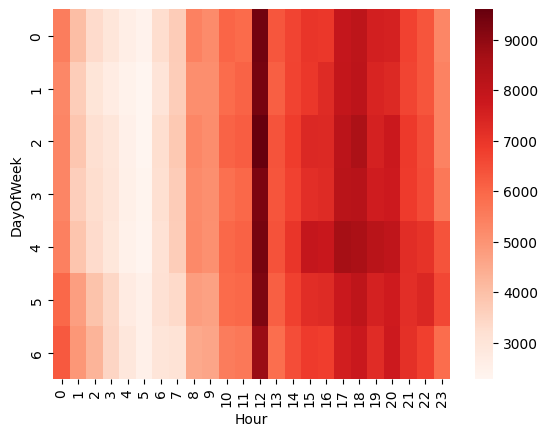

In [23]:
pivot = pd.pivot_table(data, index='DayOfWeek', columns='Hour', values='DR_NO', aggfunc='count')
sns.heatmap(pivot, cmap='Reds')


## Location Based Crime map

In [24]:
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[data['LAT'].mean(), data['LON'].mean()], zoom_start=11)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in data.sample(1000).iterrows():
    folium.Marker(location=[row['LAT'], row['LON']],
                  popup=row['Crm Cd Desc']).add_to(marker_cluster)
m.save("crime_map.html")


In [25]:
import webbrowser
webbrowser.open("crime_map.html")


True